In [1]:
#!pip install prophet

In [29]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet

In [30]:
df = pd.read_csv("craftbeerskyrose.csv")

In [31]:
df

,Year,Month,Relative Interest
0,2010,1,6
1,2010,2,9
2,2010,3,15
3,2010,4,12
4,2010,5,17
...,...,...,...
67,2015,8,84
68,2015,9,75
69,2015,10,66
70,2015,11,66


In [32]:
df.dtypes

Year                 int64
Month                int64
Relative Interest    int64
dtype: object

In [34]:
df['date'] = df['Year'].astype(str) + '-' + df['Month'].astype(str)

In [35]:
df.dtypes

Year                  int64
Month                 int64
Relative Interest     int64
date                 object
dtype: object

In [36]:
df['date'] = pd.DatetimeIndex(df['date'])
df.head()

,Year,Month,Relative Interest,date
0,2010,1,6,2010-01-01
1,2010,2,9,2010-02-01
2,2010,3,15,2010-03-01
3,2010,4,12,2010-04-01
4,2010,5,17,2010-05-01


In [37]:
df.dtypes

Year                          int64
Month                         int64
Relative Interest             int64
date                 datetime64[ns]
dtype: object

In [38]:
df=df[["date","Relative Interest"]]
df.head()

,date,Relative Interest
0,2010-01-01,6
1,2010-02-01,9
2,2010-03-01,15
3,2010-04-01,12
4,2010-05-01,17


<AxesSubplot:xlabel='date'>

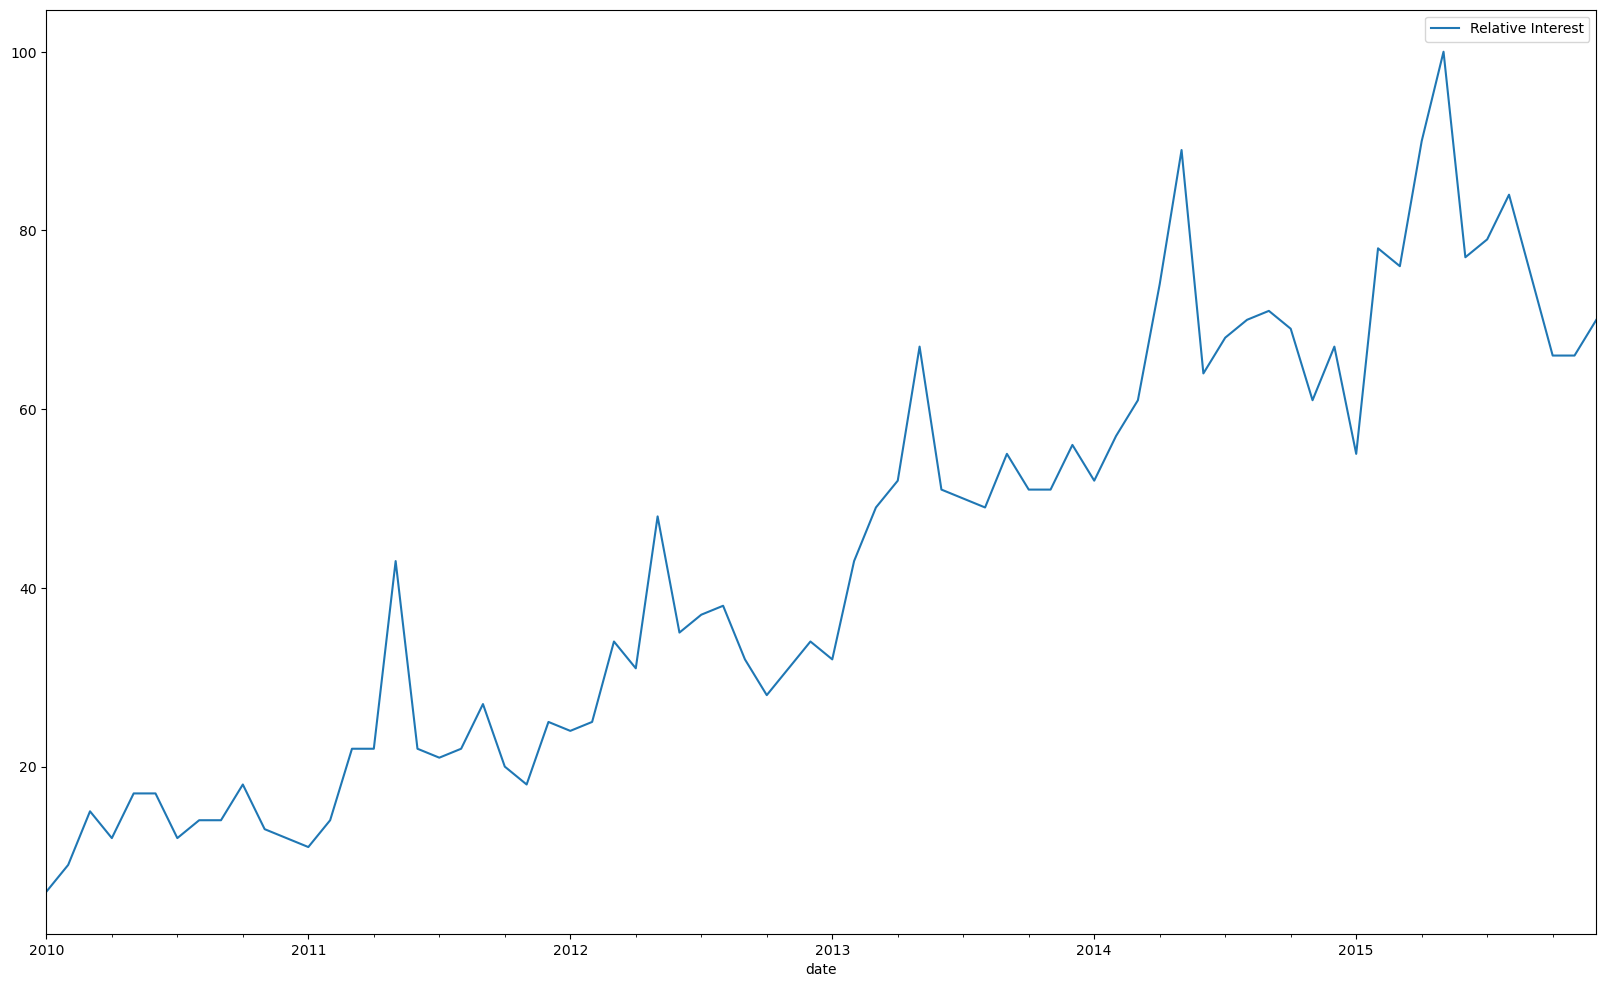

In [39]:
df.set_index('date').plot(figsize=(20, 12))

In [40]:
df.columns = ['ds','y']

In [41]:
df.tail()

,ds,y
67,2015-08-01,84
68,2015-09-01,75
69,2015-10-01,66
70,2015-11-01,66
71,2015-12-01,70


In [43]:
train = df.iloc[:len(df)-20]
test = df.iloc[len(df)-20:]

In [44]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=77,freq= 'MS') #MS for monthly, H for hourly
forecast = m.predict(future)

20:04:54 - cmdstanpy - INFO - Chain [1] start processing
20:04:54 - cmdstanpy - INFO - Chain [1] done processing


In [45]:
future.tail()

,ds
124,2020-05-01
125,2020-06-01
126,2020-07-01
127,2020-08-01
128,2020-09-01


In [46]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
124,2020-05-01,165.636965,170.499367,189.673817,156.694003,175.066612,14.703294,14.703294,14.703294,14.703294,14.703294,14.703294,0.0,0.0,0.0,180.340260
125,2020-06-01,167.074095,159.491601,179.620477,157.937081,176.718514,2.379653,2.379653,2.379653,2.379653,2.379653,2.379653,0.0,0.0,0.0,169.453748
126,2020-07-01,168.464866,160.642998,181.419172,159.177368,178.268614,2.320240,2.320240,2.320240,2.320240,2.320240,2.320240,0.0,0.0,0.0,170.785107
127,2020-08-01,169.901996,161.259196,181.997748,160.426283,179.876716,1.867903,1.867903,1.867903,1.867903,1.867903,1.867903,0.0,0.0,0.0,171.769900
128,2020-09-01,171.339126,159.120130,180.132249,161.727544,181.501629,-1.715635,-1.715635,-1.715635,-1.715635,-1.715635,-1.715635,0.0,0.0,0.0,169.623491


In [47]:
df.tail()

,ds,y
67,2015-08-01,84
68,2015-09-01,75
69,2015-10-01,66
70,2015-11-01,66
71,2015-12-01,70


In [48]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
124,2020-05-01,180.340260,170.499367,189.673817
125,2020-06-01,169.453748,159.491601,179.620477
126,2020-07-01,170.785107,160.642998,181.419172
127,2020-08-01,171.769900,161.259196,181.997748
128,2020-09-01,169.623491,159.120130,180.132249


In [49]:
test.tail()

,ds,y
67,2015-08-01,84
68,2015-09-01,75
69,2015-10-01,66
70,2015-11-01,66
71,2015-12-01,70


In [50]:
plot_plotly(m ,forecast)

In [51]:
plot_components_plotly(m, forecast)

In [52]:
from statsmodels.tools.eval_measures import rmse

In [53]:
predictions = forecast.iloc[-20:]['yhat']

In [54]:


print("Mean Value of Test Dataset:", test['y'].mean())

Mean Value of Test Dataset: 73.75
